# Compare average infection curves for a few output files from the `sim` routine.

See the file [running-simulations.md](../doc/running-simulations.md) in this repository for details on running simulations. The runs compared here are as follows:

```bash
python -m dissim.sim football football-pb-05-pd-500.csv -b 0.05 -d 0.500
python -m dissim.sim football football-pb-05-pd-400.csv -b 0.05 -d 0.400
python -m dissim.sim football football-pb-05-pd-320.csv -b 0.05 -d 0.320
python -m dissim.sim football football-pb-05-pd-256.csv -b 0.05 -d 0.256
python -m dissim.sim football football-pb-05-pd-204.csv -b 0.05 -d 0.204
python -m dissim.sim football football-pb-05-pd-163.csv -b 0.05 -d 0.163
python -m dissim.sim football football-pb-05-pd-131.csv -b 0.05 -d 0.131
python -m dissim.sim football football-pb-05-pd-104.csv -b 0.05 -d 0.104
python -m dissim.sim football football-pb-05-pd-083.csv -b 0.05 -d 0.083
python -m dissim.sim football football-pb-05-pd-067.csv -b 0.05 -d 0.067
python -m dissim.sim football football-pb-05-pd-053.csv -b 0.05 -d 0.053
python -m dissim.sim football football-pb-05-pd-042.csv -b 0.05 -d 0.042
python -m dissim.sim football football-pb-05-pd-034.csv -b 0.05 -d 0.034
python -m dissim.sim football football-pb-05-pd-027.csv -b 0.05 -d 0.027
python -m dissim.sim football football-pb-05-pd-021.csv -b 0.05 -d 0.021
python -m dissim.sim football football-pb-05-pd-017.csv -b 0.05 -d 0.017
python -m dissim.sim football football-pb-05-pd-014.csv -b 0.05 -d 0.014
python -m dissim.sim football football-pb-05-pd-011.csv -b 0.05 -d 0.011
python -m dissim.sim football football-pb-05-pd-009.csv -b 0.05 -d 0.009
python -m dissim.sim football football-pb-05-pd-007.csv -b 0.05 -d 0.007
python -m dissim.sim football football-pb-05-pd-005.csv -b 0.05 -d 0.005
python -m dissim.sim football football-pb-05-pd-004.csv -b 0.05 -d 0.004
```

## Procedure

I ran the simulation with no vaccinated vertices and each vertex selected in turn as the first to be infected. For each selection, 100 trials were run for 100 runs (that is, 100 steps in time). 

In this notebook, I read the output files and averaged the number of infected nodes at each point in time to get one "curve" with 100 points. The two curves are plotted below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the output files

In [2]:
pdi = [500, 400, 320, 256, 204, 163, 131, 104, 83, 67, 53, 42, 34, 27, 21, 17, 14, 11, 9, 7, 5, 4]
pds = [float(x) / 1000 for x in pdi]
fnames = [f"football-pb-05-pd-{x:03d}.csv" for x in pdi]
names = [f"$p_b=0.05$, $p_d={x:5.3f}$" for x in pds]

dfs = [pd.read_csv("../" + fname) for fname in fnames]


## Compute averages for all the 50 columns with number of infected nodes at each point in time

In [3]:
df_means = [df.iloc[:, 12:].mean(axis=0) for df in dfs]

X = list(range(len(df_means[0])))

## Plot the results with a band showing the single standard deviation range

The plots below compare results for $p_b = 0.05, p_d=0.07$ (in red) and $p_b=0.05, p_d = 0.40$ (in blue).

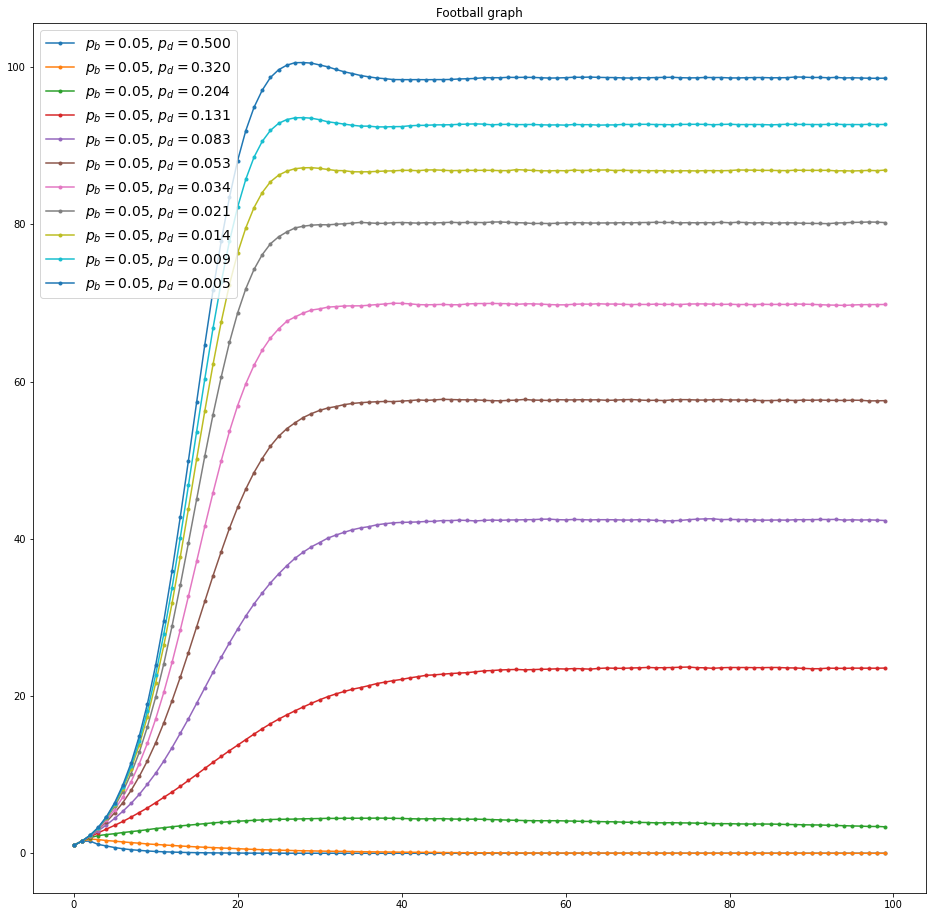

In [4]:
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_means[i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title("Football graph")
plt.show()